#📌 Extracción

In [269]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos = pd.read_json(url)

#🔧 Transformación

In [270]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [271]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [272]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [273]:
df1 = pd.json_normalize(datos["customer"])
df2 = pd.json_normalize(datos["phone"])
df3 = pd.json_normalize(datos["internet"])
df4 = pd.json_normalize(datos["account"])

df = pd.concat([datos[['customerID','Churn']],df1, df2, df3,df4],axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [275]:
df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [276]:
df['Cuentas_Diarias'] = df['Charges.Monthly']/30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [277]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [278]:
import numpy as np
df.replace("", np.nan, inplace=True)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

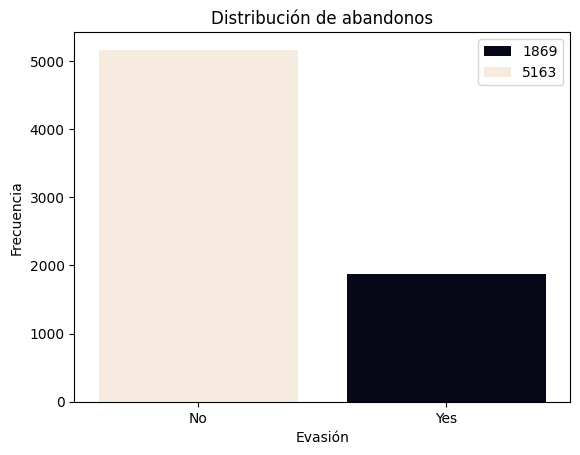

In [280]:
sns.barplot(x=df["Churn"].value_counts().index, y=df["Churn"].value_counts().values, hue=df["Churn"].value_counts().values,palette='rocket')

plt.xlabel("Evasión")
plt.ylabel("Frecuencia")
plt.title("Distribución de abandonos")
plt.show()

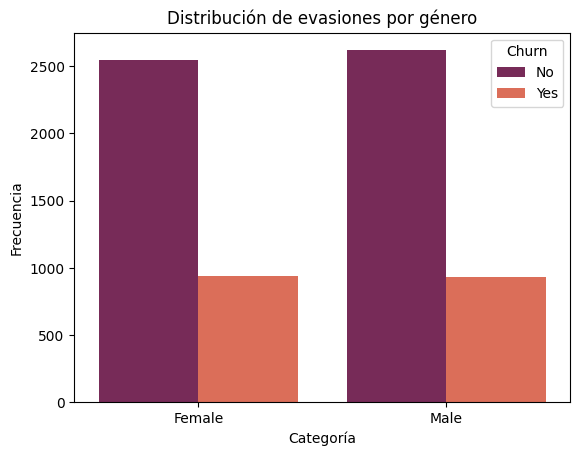

In [281]:
sns.countplot(data=df, x="gender", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por género")
plt.show()

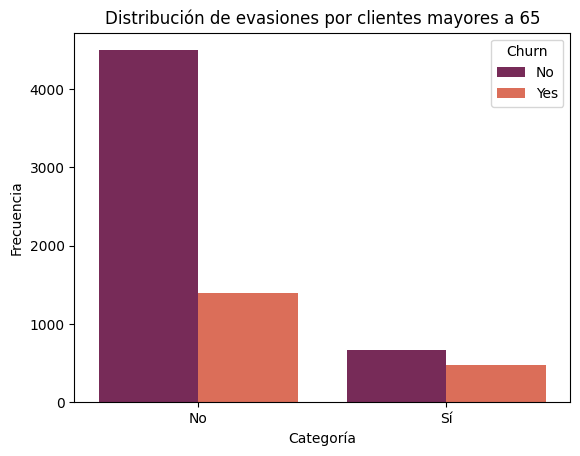

In [282]:
ax = sns.countplot(data=df, x="SeniorCitizen", hue="Churn", palette="rocket")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No", "Sí"])

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por clientes mayores a 65")
plt.show()

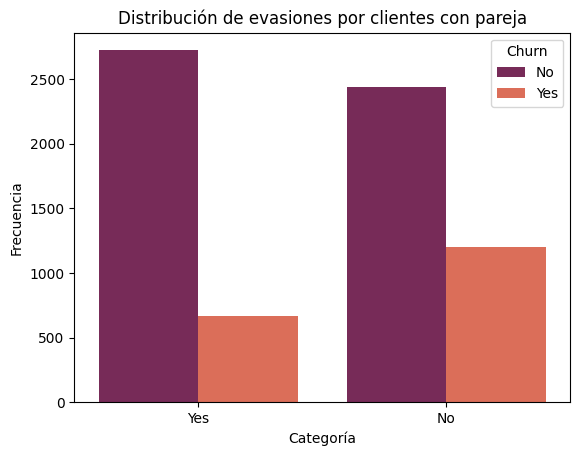

In [283]:
sns.countplot(data=df, x="Partner", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por clientes con pareja")
plt.show()

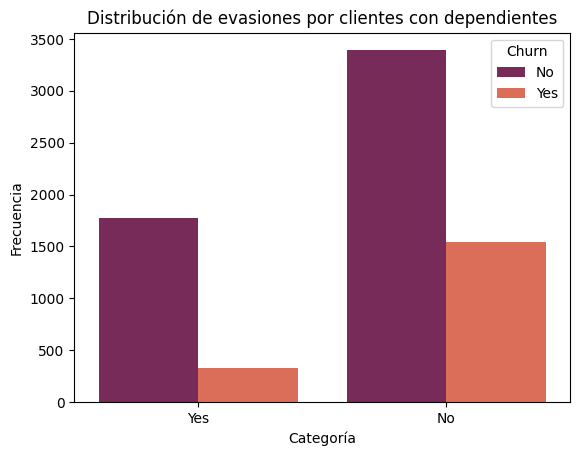

In [284]:
sns.countplot(data=df, x="Dependents", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por clientes con dependientes")
plt.show()

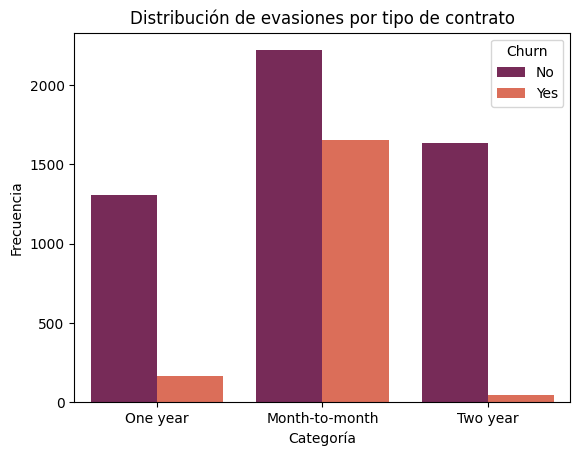

In [285]:
sns.countplot(data=df, x="Contract", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por tipo de contrato")
plt.show()

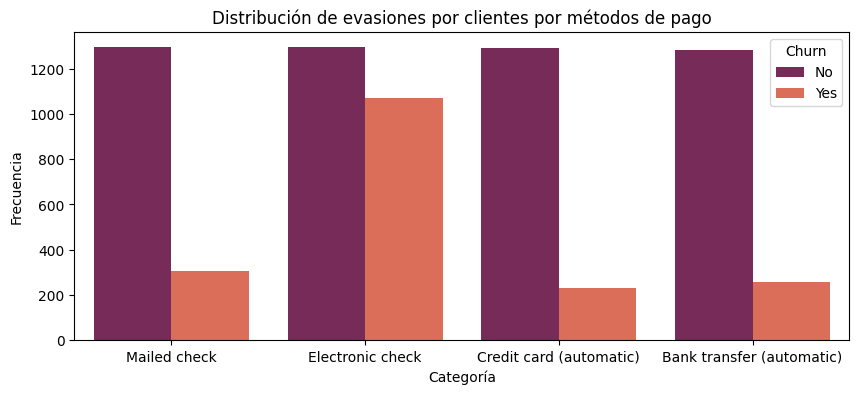

In [286]:
fig, ax = plt.subplots(figsize=(10,4))
ax= sns.countplot(data=df, x="PaymentMethod", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por clientes por métodos de pago")
plt.show()

<ipython-input-287-c494075f6ab5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_si, x="tenure", palette="rocket", ax=ax[0])
<ipython-input-287-c494075f6ab5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no, x="tenure", palette="tab10", ax=ax[1])


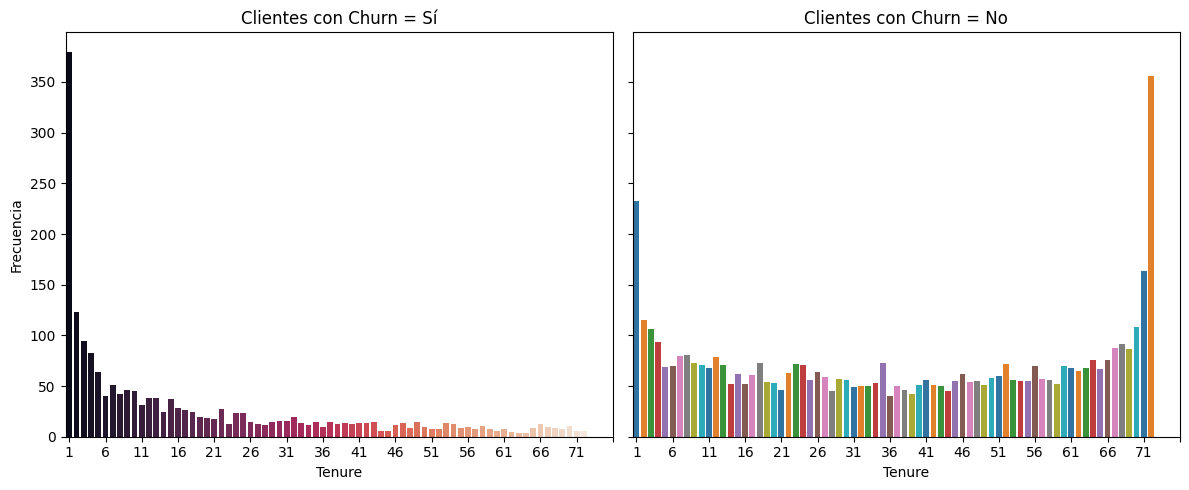

In [287]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Filtrar datos para "Sí" y "No"
df_si = df[df["Churn"] == "Yes"]
df_no = df[df["Churn"] == "No"]

# Gráfico para "Sí"
sns.countplot(data=df_si, x="tenure", palette="rocket", ax=ax[0])
ax[0].set_title("Clientes con Churn = Sí")
ax[0].set_xlabel("Tenure")
ax[0].set_ylabel("Frecuencia")
ax[0].set_xticks(range(0, max(df_si["tenure"]) + 5, 5))  # Espaciado de ticks

# Gráfico para "No"
sns.countplot(data=df_no, x="tenure", palette="tab10", ax=ax[1])
ax[1].set_title("Clientes con Churn = No")
ax[1].set_xlabel("Tenure")
ax[1].set_xticks(range(0, max(df_no["tenure"]) + 5, 5))  # Espaciado de ticks

# Ajustar diseño
plt.tight_layout()
plt.show()

In [288]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


<ipython-input-289-db9ec9518ff8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="Charges.Total", palette="rocket")


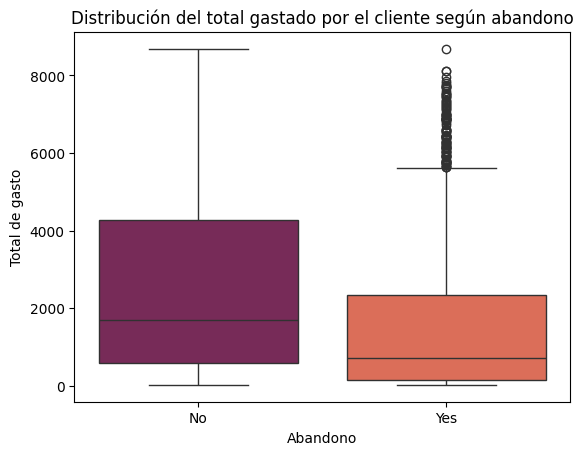

In [289]:
#df["Churn"] = df["Churn"].map({"Yes": "Sí", "No": "No"})  # Opcional para mejorar etiquetas
sns.boxplot(data=df, x="Churn", y="Charges.Total", palette="rocket")

plt.xlabel("Abandono")
plt.ylabel("Total de gasto")
plt.title("Distribución del total gastado por el cliente según abandono")
plt.show()

<ipython-input-290-c1a8fa7fb6d7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Churn", y="Charges.Total", palette=["skyblue", "salmon"], ci=None)
<ipython-input-290-c1a8fa7fb6d7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Churn", y="Charges.Total", palette=["skyblue", "salmon"], ci=None)


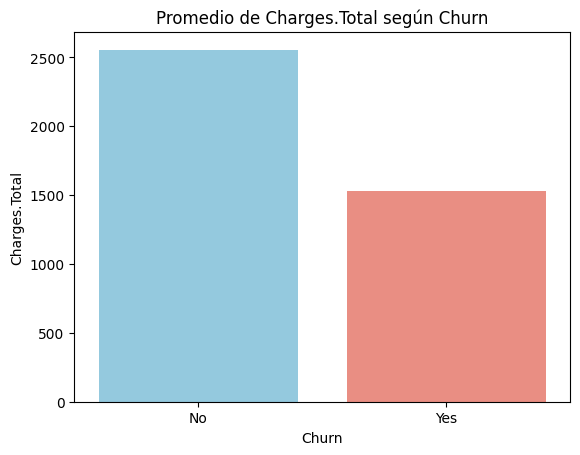

In [290]:
sns.barplot(data=df, x="Churn", y="Charges.Total", palette=["skyblue", "salmon"], ci=None)
plt.title("Promedio de Charges.Total según Churn")
plt.show()

#📄Informe final

##Introducción

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.El desafío consiste en recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa.

##Limpieza y Tratamiento de Datos

Con la librería de pandas se dio lectura a los datos y conversión a DataFrame
```
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos = pd.read_json(url)
```

##Análisis Exploratorio de Datos

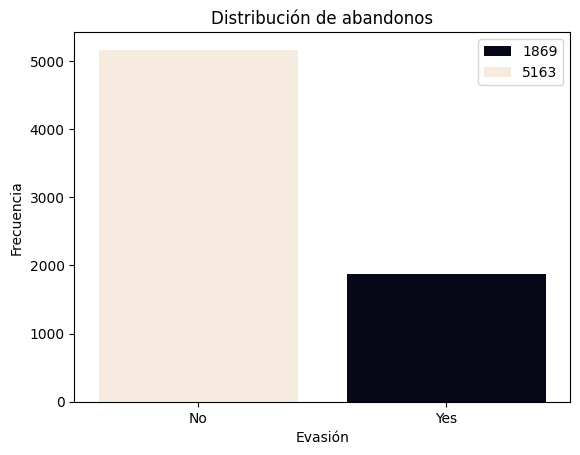

In [291]:
sns.barplot(x=df["Churn"].value_counts().index, y=df["Churn"].value_counts().values, hue=df["Churn"].value_counts().values,palette='rocket')

plt.xlabel("Evasión")
plt.ylabel("Frecuencia")
plt.title("Distribución de abandonos")
plt.show()

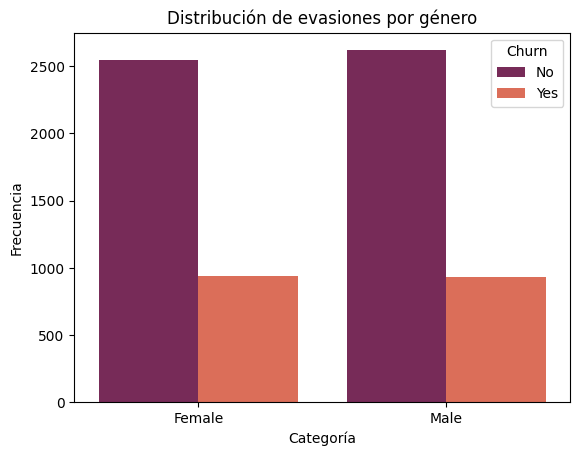

In [292]:
sns.countplot(data=df, x="gender", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por género")
plt.show()

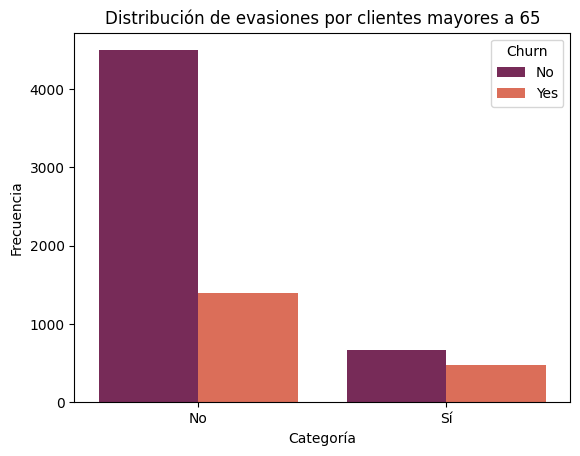

In [293]:
ax = sns.countplot(data=df, x="SeniorCitizen", hue="Churn", palette="rocket")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No", "Sí"])

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por clientes mayores a 65")
plt.show()

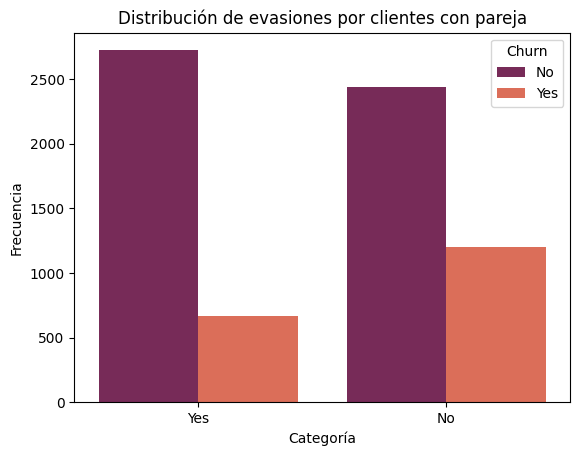

In [294]:
sns.countplot(data=df, x="Partner", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por clientes con pareja")
plt.show()

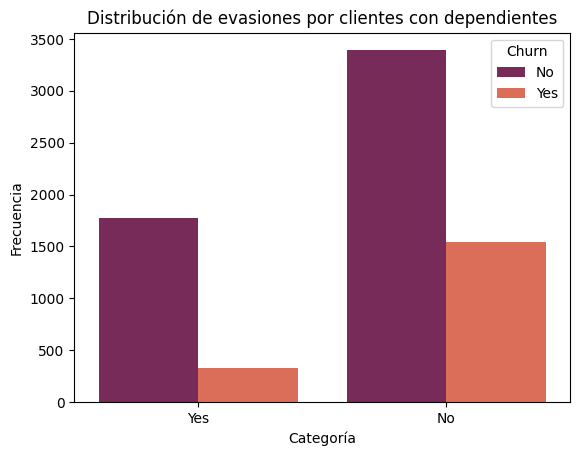

In [295]:
sns.countplot(data=df, x="Dependents", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por clientes con dependientes")
plt.show()

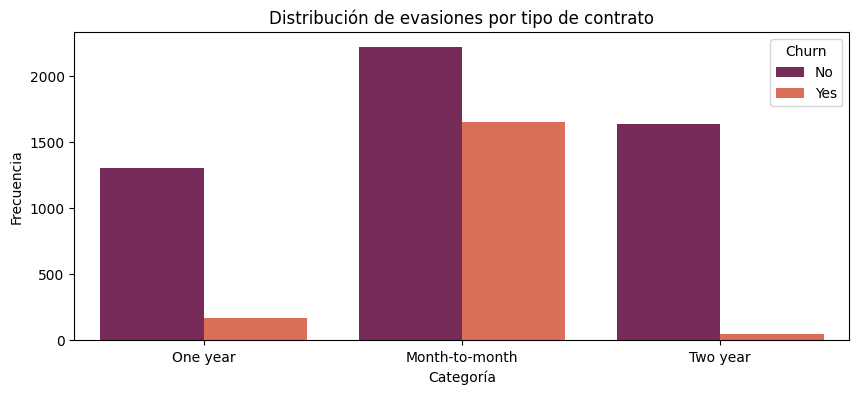

In [306]:
fig, ax = plt.subplots(figsize=(10,4))
ax=sns.countplot(data=df, x="Contract", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por tipo de contrato")
#fig.savefig('/content/distibucion_evasionesPorContrato.png', transparent=False,dpi=300,bbox_inches='tight')
plt.show()

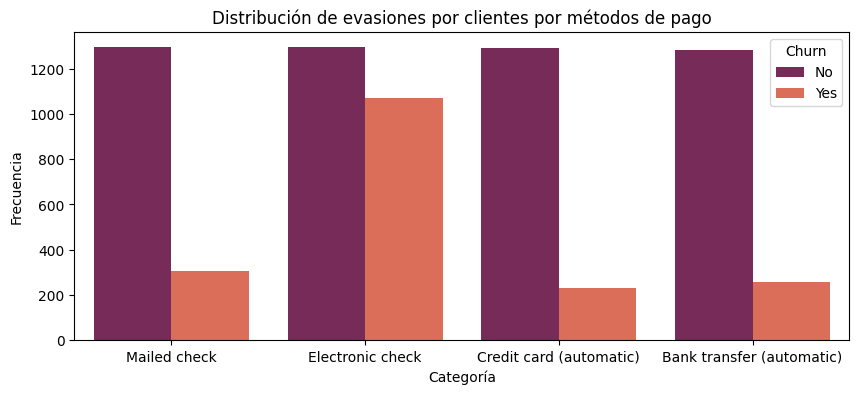

In [301]:
fig, ax = plt.subplots(figsize=(10,4))
ax= sns.countplot(data=df, x="PaymentMethod", hue="Churn", palette="rocket")

plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Distribución de evasiones por clientes por métodos de pago")
#fig.savefig('/content/distibucion_evasionesPorMetodoPago.png', transparent=False,dpi=300,bbox_inches='tight')
plt.show()

<ipython-input-298-c494075f6ab5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_si, x="tenure", palette="rocket", ax=ax[0])
<ipython-input-298-c494075f6ab5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no, x="tenure", palette="tab10", ax=ax[1])


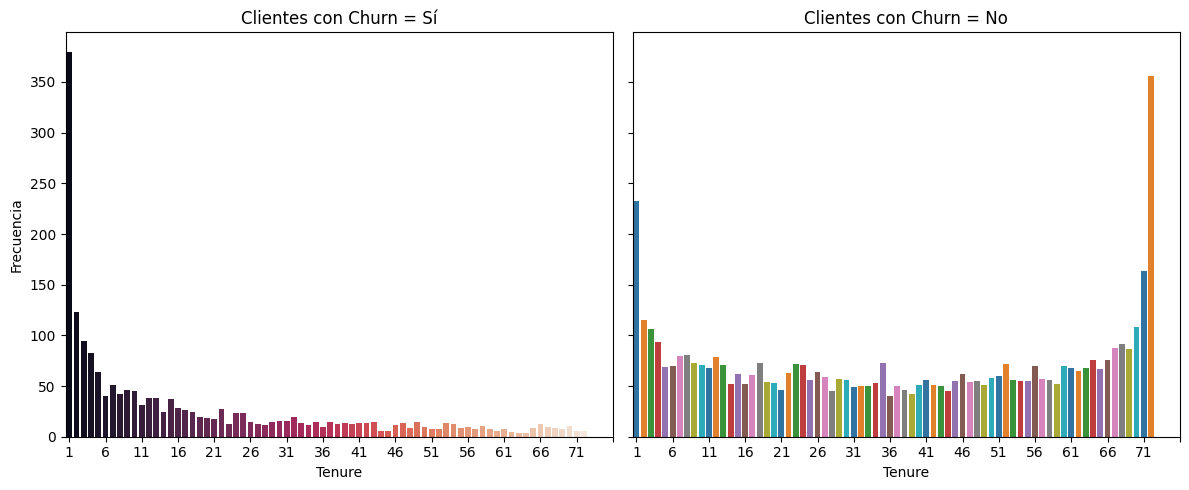

In [298]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Filtrar datos para "Sí" y "No"
df_si = df[df["Churn"] == "Yes"]
df_no = df[df["Churn"] == "No"]

# Gráfico para "Sí"
sns.countplot(data=df_si, x="tenure", palette="rocket", ax=ax[0])
ax[0].set_title("Clientes con Churn = Sí")
ax[0].set_xlabel("Tenure")
ax[0].set_ylabel("Frecuencia")
ax[0].set_xticks(range(0, max(df_si["tenure"]) + 5, 5))  # Espaciado de ticks

# Gráfico para "No"
sns.countplot(data=df_no, x="tenure", palette="tab10", ax=ax[1])
ax[1].set_title("Clientes con Churn = No")
ax[1].set_xlabel("Tenure")
ax[1].set_xticks(range(0, max(df_no["tenure"]) + 5, 5))  # Espaciado de ticks

# Ajustar diseño
plt.tight_layout()
plt.show()

<ipython-input-299-db9ec9518ff8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="Charges.Total", palette="rocket")


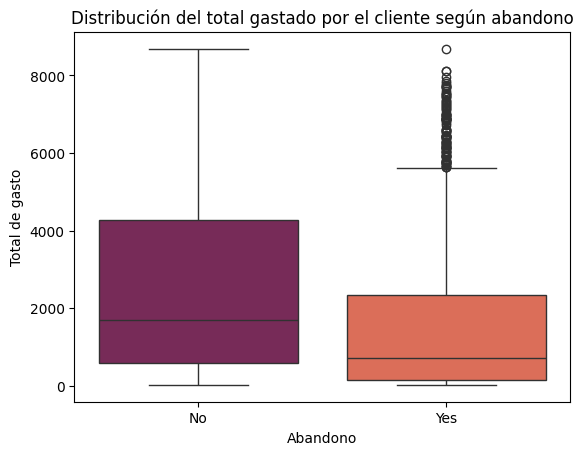

In [299]:
#df["Churn"] = df["Churn"].map({"Yes": "Sí", "No": "No"})  # Opcional para mejorar etiquetas
sns.boxplot(data=df, x="Churn", y="Charges.Total", palette="rocket")

plt.xlabel("Abandono")
plt.ylabel("Total de gasto")
plt.title("Distribución del total gastado por el cliente según abandono")
plt.show()

##Conclusiones e Insights




*   Los abandonos representan menos del 30% del total de clientes, clientes que abandonan 1869 y clientes que no abandonan 5163. (1869/(5163+1869))

*   El género de los clientes no afecta mucho la decisión de abandonar o no, se visualiza un comportamiento similar.

* Los clientes que no superan los 65 años son más fieles a la marca, aunque también son los que más abandonan.

* Los clientes con pareja y con dependientes son los que tienen la menor tasa de abandono.

* Los contratos de dos años tienen la menor tasa de abandono, mientras que los de mes a mes tienen la más alta

* El método de pago con más abandono es el check electrónico.

* Los clientes que más gastan son los que más abandonan.




##Recomendaciones



*   Se recomienda ofrecer servicios a clientes de menos de 65 años, que tienen pareja y tienen dependientes.
*   No se recomienda diferenciar los servicios para personas de sexo masculino y femenino.
* Se recomienda hacer contratos con periodicidad de uno a dos años, y no mes a mes.
* Se recomienda desincentivar el método de pago electrónico.
